In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
pd.set_option('display.max_columns', 200)

In [18]:
city_data = pd.read_csv('clean_city_data.csv', index_col=0)

In [19]:
city_data

,id,city,state,is superhost,neighbourhood,zipcode,latitude,longitude,property type,room type,accommodates,bathrooms,bedrooms,beds,bed type,amenities,review score,num reviews,price,logprice,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Apartment,Condo,Guest,Hotel,House,Other,Zhvi,Normalized Zhvi,Log Zhvi,Wifi,Heat,Essentials,Smoke Detector,Kitchen,Air Conditioning,Hangers,Shampoo,TV,Washer,Dryer,Carbon Monoxide Detector,Hair Dryer,Laptop Friendly Workspace,Iron,Fire Extinguisher,Hot Water,Free Parking on Premises,Self Check-in,First Aid Kit,review conf
0,1078,Austin,TX,1,University of Texas,78705.0,30.30123,-97.73674,Guest,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",98.0,208,85.0,4.442651,1,0,0,0,0,0,0,1,0,0,1,0,0,0,274200.000000,0.099071,12.521613,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,97.129553
1,2265,Austin,TX,1,East Downtown,78702.0,30.27750,-97.71398,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",93.0,23,225.0,5.416100,1,0,0,0,0,0,0,1,0,0,0,0,1,0,431500.000000,0.304934,12.975023,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0,86.845792
2,5245,Austin,TX,1,East Downtown,78702.0,30.27577,-97.71379,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",91.0,9,100.0,4.605170,0,1,0,0,0,0,0,1,0,0,0,0,1,0,431500.000000,0.304934,12.975023,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,78.734737
3,5456,Austin,TX,1,East Downtown,78702.0,30.26112,-97.73448,Guest,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",96.0,472,95.0,4.553877,1,0,0,0,0,0,0,1,0,0,1,0,0,0,431500.000000,0.304934,12.975023,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,95.628629
4,5769,Austin,TX,1,SW Williamson Co.,78729.0,30.45596,-97.78370,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",98.0,240,40.0,3.688879,0,1,0,0,0,0,0,1,0,0,0,0,1,0,298200.000000,0.130480,12.605520,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,1,1,1,0,1,97.243784
5,6448,Austin,TX,1,Zilker,78704.0,30.26027,-97.76503,Guest,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",99.0,199,129.0,4.859812,1,0,0,0,0,0,0,1,0,0,1,0,0,0,546200.000000,0.455045,13.210740,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,98.071993
6,8502,Austin,TX,0,East Riverside,78741.0,30.23616,-97.73682,Guest,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",92.0,45,40.0,3.688879,1,0,0,0,0,0,0,1,0,0,1,0,0,0,255600.000000,0.074728,12.451369,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,88.696521
7,14765,Austin,TX,1,Travis Heights,78704.0,30.25012,-97.74193,House,Entire home/apt,5,2.0,2.0,4.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",94.0,44,260.0,5.560682,1,0,0,0,0,0,0,1,0,0,0,0,1,0,546200.000000,0.455045,13.210740,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,90.466874
8,14913,Austin,TX,0,NaN,78748.0,30.15645,-97.82411,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Pool,Kitc...",98.0,25,300.0,5.703782,1,0,0,0,0,0,0,1,0,0,0,0,1,0,295600.000000,0.127078,12.596762,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,0,91.606568
9,21126,Austin,TX,1,Travis Heights,78704.0,30.24503,-97.74075,House,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",98.0,71,550.0,6.309918,1,0,0,0,0,0,0,1,0,0,0,0,1,0,546200.000000,0.455045,13.210740,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,95.536172


# Normalized Zhvi, Log Price, DTR

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

In [82]:
model_data = city_data.drop(['neighbourhood','property type','room type','bed type','id','city','state','zipcode','longitude','latitude','amenities','review score', 'num reviews', 'Zhvi', 'Log Zhvi'], axis=1)
model_data['review conf'] = model_data['review conf']/100
model_data.head(5)

,is superhost,accommodates,bathrooms,bedrooms,beds,price,logprice,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Apartment,Condo,Guest,Hotel,House,Other,Normalized Zhvi,Wifi,Heat,Essentials,Smoke Detector,Kitchen,Air Conditioning,Hangers,Shampoo,TV,Washer,Dryer,Carbon Monoxide Detector,Hair Dryer,Laptop Friendly Workspace,Iron,Fire Extinguisher,Hot Water,Free Parking on Premises,Self Check-in,First Aid Kit,review conf
0,1,2,1.0,1.0,1.0,85.0,4.442651,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0.099071,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0.971296
1,1,4,2.0,2.0,2.0,225.0,5.416100,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.304934,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0,0.868458
2,1,2,1.0,1.0,1.0,100.0,4.605170,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0.304934,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0.787347
3,1,3,1.0,1.0,2.0,95.0,4.553877,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0.304934,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0.956286
4,1,2,1.0,1.0,1.0,40.0,3.688879,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0.130480,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0.972438


In [83]:
X = model_data.drop(['logprice','price'],axis=1)
y = model_data['logprice']

In [84]:
model =  DecisionTreeRegressor(max_depth=5)

In [85]:
scores = []
seed = 7
np.random.seed(seed)
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)

print("Results: %.2f (%.2f) R2" % (results.mean(), results.std()))

Results: 0.53 (0.01) R2


In [86]:
pred = cross_val_predict(model, X, y, cv=kfold)

In [87]:
print("Mean squared error: %.2f"% mean_squared_error(y, pred))
print('Test Variance score: %.2f' % r2_score(y, pred))

Mean squared error: 0.33
Test Variance score: 0.53


In [89]:
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [90]:
importances = model.feature_importances_

In [91]:
indices = np.argsort(importances)[::-1]

In [93]:
our_features = ['is superhost', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'Entire home/apt', 'Private room', 'Shared room', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Apartment', 'Condo', 'Guest', 'Hotel', 'House', 'Other', 'Normalized Zhvi','Wifi', 'Heat', 'Essentials', 'Smoke Detector', 'Kitchen', 'Air Conditioning', 'Hangers', 'Shampoo', 'TV', 'Washer', 'Dryer', 'Carbon Monoxide Detector', 'Hair Dryer', 'Laptop Friendly Workspace', 'Iron', 'Fire Extinguisher', 'Hot Water', 'Free Parking on Premises', 'Self Check-in', 'First Aid Kit', 'review conf']
indices_name = [our_features[indices[k]] for k in range(41)]






In [95]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, indices_name[f], importances[indices[f]]))

Feature ranking:
1. Entire home/apt (0.561430)
2. bathrooms (0.261513)
3. Normalized Zhvi (0.065398)
4. review conf (0.027916)
5. accommodates (0.026655)
6. Private room (0.022969)
7. Hotel (0.015864)
8. bedrooms (0.012273)
9. Hot Water (0.002300)
10. is superhost (0.001495)
11. Self Check-in (0.000946)
12. Hangers (0.000908)
13. TV (0.000331)
14. Dryer (0.000000)
15. Apartment (0.000000)
16. Free Parking on Premises (0.000000)
17. Fire Extinguisher (0.000000)
18. beds (0.000000)
19. Iron (0.000000)
20. Laptop Friendly Workspace (0.000000)
21. Shared room (0.000000)
22. Airbed (0.000000)
23. Couch (0.000000)
24. Futon (0.000000)
25. Pull-out Sofa (0.000000)
26. Real Bed (0.000000)
27. Guest (0.000000)
28. Condo (0.000000)
29. Washer (0.000000)
30. Hair Dryer (0.000000)
31. House (0.000000)
32. Other (0.000000)
33. Carbon Monoxide Detector (0.000000)
34. First Aid Kit (0.000000)
35. Heat (0.000000)
36. Essentials (0.000000)
37. Smoke Detector (0.000000)
38. Kitchen (0.000000)
39. Air Co

(-1, 41)

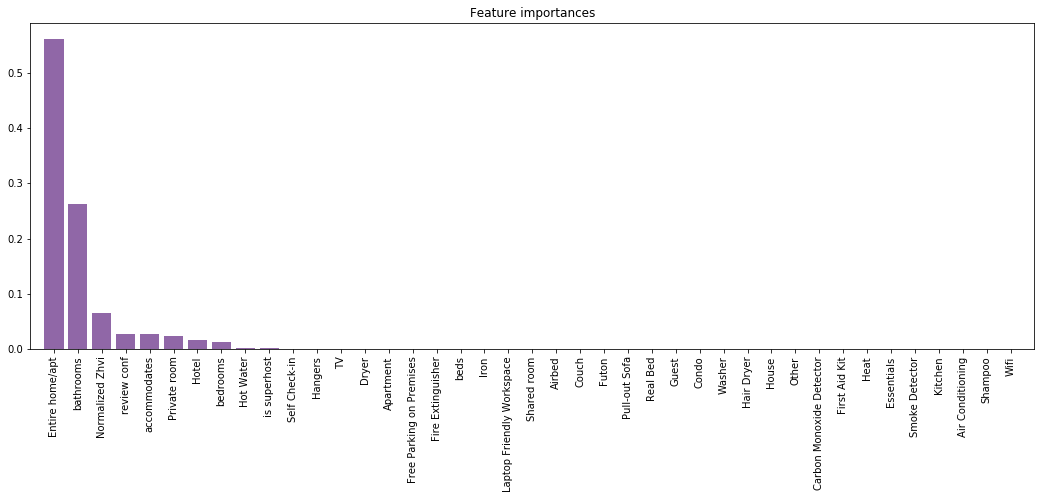

In [96]:
plt.figure(figsize =(18, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="#9067a7", align="center")
plt.xticks(range(X.shape[1]), indices_name, rotation='vertical')
plt.xlim([-1, X.shape[1]])